In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape


(100, 4)

In [6]:
#Steps
# 0. Preprocess + EDA + Feature Selection
# 1.Extract the input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection ---
#     we kept 10 datas out of 100 to evaluate the accuracy of the model
# 6. Deploy the model

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
import matplotlib.pyplot as plt

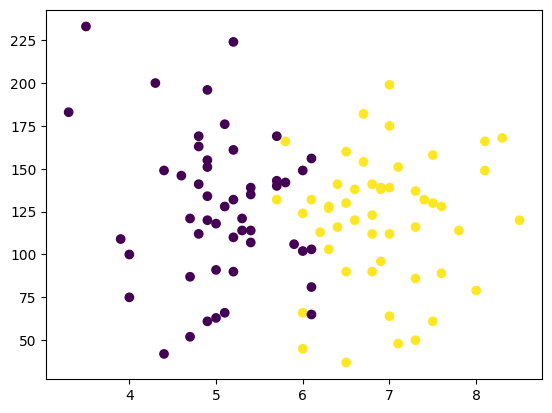

In [11]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])

In [ ]:
# logistic reason tries to find the line which separates the students
# who got placement and who didn't

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,)

In [26]:
X_train

,cgpa,iq
15,5.1,176.0
0,6.8,123.0
26,7.0,199.0
35,6.8,90.0
5,7.1,48.0
...,...,...
33,6.0,149.0
75,4.8,169.0
27,6.0,124.0
76,4.9,155.0


In [27]:
y_train

,placement
15,0
0,1
26,1
35,1
5,1
...,...
33,0
75,0
27,1
76,0


In [31]:
X_test #10 rows

,cgpa,iq
19,5.2,132.0
45,6.0,66.0
7,5.0,63.0
94,4.7,52.0
43,6.8,141.0
86,5.1,128.0
49,5.4,135.0
6,5.7,143.0
79,6.5,90.0
77,7.3,50.0


In [29]:
y_test

,placement
19,0
45,1
7,0
94,0
43,1
86,0
49,0
6,0
79,1
77,1


In [33]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [35]:
X_test

array([[-0.69962405,  0.14823232],
       [-0.01334433, -1.5385493 ],
       [-0.87119399, -1.61522119],
       [-1.12854888, -1.89635146],
       [ 0.6729354 ,  0.378248  ],
       [-0.78540902,  0.04600314],
       [-0.52805412,  0.22490422],
       [-0.27069923,  0.4293626 ],
       [ 0.4155805 , -0.92517416],
       [ 1.10186023, -1.94746606]])

In [41]:
#train the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


In [42]:
clf.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred = clf.predict(X_test)
y_pred


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [49]:
y_test

,placement
19,0
45,1
7,0
94,0
43,1
86,0
49,0
6,0
79,1
77,1


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

<Axes: >

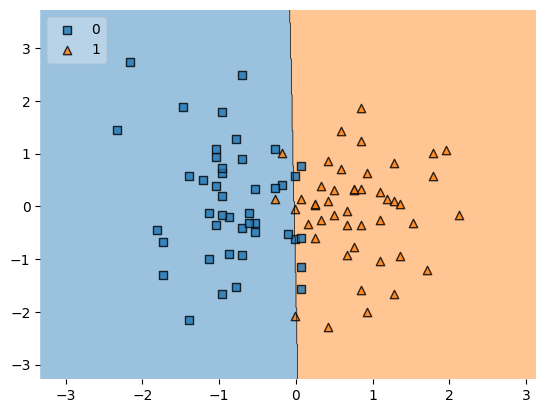

In [53]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [55]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))

# **So, a placement predictor model has been developed , we can upload it on aws , herooko **
